In [211]:
import pandas as pd
import json
import matplotlib.pyplot as plt
from igraph import *

In [212]:
df = pd.read_csv("characters.csv", header=0)
df = df.drop(columns=["total lines", "total words", "movie appearances", "avg words per line", "avg lines per movie"])
df.iloc[0:10]

,character,Ant-Man,Avengers: Age of Ultron,Avengers: Endgame,Avengers: Infinity War,Black Panther,Captain America: Civil War,Captain America: The First Avenger,Captain America: The Winter Soldier,Captain Marvel,Guardians of the Galaxy Vol. 2,Iron Man,Iron Man 2,Iron Man 3,Spider-Man: Homecoming,The Avengers,Thor,Thor: Ragnarok,Thor: The Dark World
0,TONY STARK,0,173,137,119,0,165,0,0,0,0,252,335,358,74,152,0,0,0
1,STEVE ROGERS,3,133,119,25,0,154,186,218,3,0,0,0,0,7,121,0,0,0
2,THOR,0,55,70,74,0,0,0,0,0,0,0,0,0,0,47,166,289,133
3,PETER PARKER,0,0,7,39,0,73,0,0,0,0,0,0,0,402,0,0,0,0
4,NATASHA ROMANOFF,1,79,69,15,0,64,0,112,3,0,0,55,0,0,97,0,1,0
5,PEPPER POTTS,0,0,15,21,0,0,0,0,0,0,114,157,88,7,29,0,0,0
6,BRUCE BANNER,0,83,93,45,0,0,0,0,2,0,0,0,7,0,84,0,62,0
7,NICK FURY,0,26,0,7,0,0,5,68,120,0,0,28,0,0,109,0,0,0
8,LOKI,0,0,1,6,0,0,0,0,0,0,0,0,0,0,68,91,74,76
9,SCOTT LANG,222,0,70,0,0,22,0,0,0,0,0,0,0,0,0,0,0,0


In [213]:
# def select_columns(df, *movies):
#     columns = ["character"] + [movies]
#     df = df[columns].loc[df[columns][movies] != 0]
#     return df

def select_columns(df, movies):
    columns = ["character"] + movies
    df = df[columns]
    df = df.loc[~(df==0).all(axis=1)]
    return df

def select_character(df, characters):
    df = df.loc[df["character"].isin(characters)]
    return df

In [214]:
for column in df.columns.difference(["character", "movie appearances", "avg lines per movie", "avg words per line", "total lines", "total words"]):
    character = df[["character", column]].sort_values(by=[column], ascending=False).iloc[0]["character"]
    movie = column
    print("\ncharacter: ", character)
    print("movie: ", movie)
    top5 = df[["character", column]].sort_values(by=[column], ascending=False).iloc[1:10]["character"].to_list()
    print("top 5: ", top5)


character:  SCOTT LANG
movie:  Ant-Man
top 5:  ['HANK PYM', 'HOPE VAN DYNE', 'LUIS', 'DARREN CROSS', 'JAMES "JIM" PAXTON', 'DAVE', 'KURT', 'CASSIE LANG', 'MAGGIE LANG']

character:  TONY STARK
movie:  Avengers: Age of Ultron
top 5:  ['STEVE ROGERS', 'BRUCE BANNER', 'ULTRON', 'NATASHA ROMANOFF', 'CLINT BARTON', 'THOR', 'WANDA MAXIMOFF', 'NICK FURY', 'MARIA HILL']

character:  TONY STARK
movie:  Avengers: Endgame
top 5:  ['STEVE ROGERS', 'BRUCE BANNER', 'THOR', 'SCOTT LANG', 'NATASHA ROMANOFF', 'ROCKET', 'CLINT BARTON', 'JAMES RHODES', 'THANOS']

character:  TONY STARK
movie:  Avengers: Infinity War
top 5:  ['PETER QUILL', 'THOR', 'THANOS', 'STEPHEN STRANGE', 'ROCKET', 'BRUCE BANNER', 'GAMORA', 'PETER PARKER', 'WANDA MAXIMOFF']

character:  T'CHALLA
movie:  Black Panther
top 5:  ['SHURI', 'NAKIA', 'EVERETT ROSS', 'OKOYE', "N'JADAKA (KILLMONGER)", 'ULYSSES KLAUE', 'ZURI', 'RAMONDA', "M'BAKU"]

character:  TONY STARK
movie:  Captain America: Civil War
top 5:  ['STEVE ROGERS', 'PETER PARKE

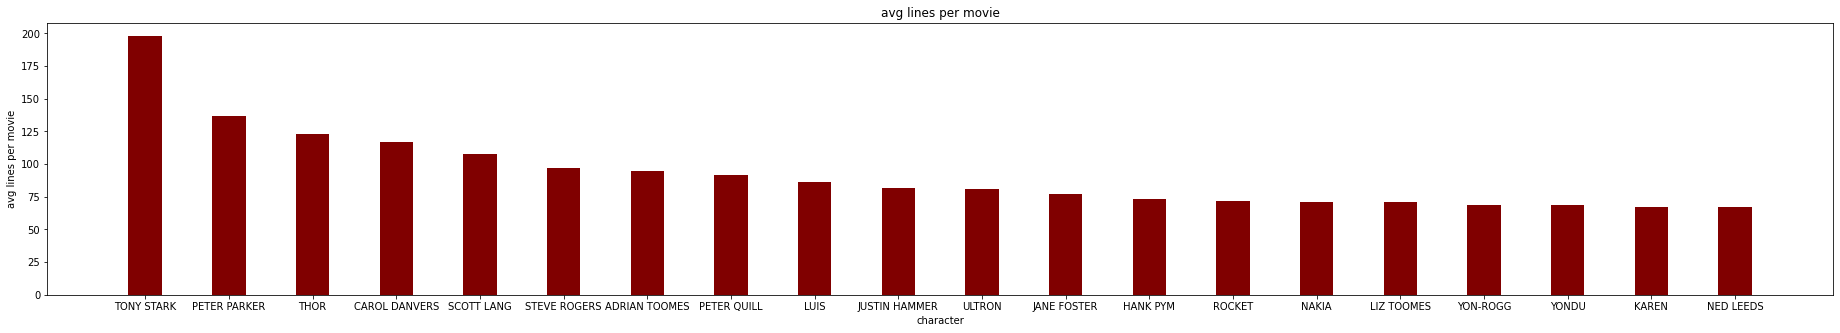

In [202]:
df = pd.read_csv("characters.csv", header=0)

plt.bar(df[["character","avg lines per movie"]].sort_values(by="avg lines per movie", ascending=False)["character"].iloc[0:20], df[["character","avg lines per movie"]].sort_values(by="avg lines per movie", ascending=False)["avg lines per movie"].iloc[0:20].values, color ="maroon",
        width = 0.4)

plt.rcParams["figure.figsize"] = (32,5)
plt.xlabel("character")
plt.ylabel("avg lines per movie")
plt.title("avg lines per movie")
plt.show()

In [221]:
df = pd.read_csv("characters.csv", header=0)
df = df.drop(columns=["total lines", "total words", "movie appearances", "avg words per line", "avg lines per movie"])

thor = ["Thor"]

colunas = select_columns(df, thor) # Por filme
# colunas = select_columns(df, df.columns.to_list()) # Por filme
# df = select_character(df, personagens_principais) #Por personagem

df = df.filter(items=colunas)
filmes = colunas.columns.difference(["character"])
df = df[(df[filmes] != 0).any(axis=1)]
personagens = df["character"].loc[~(df==0).all(axis=1)]
numero_personagens = personagens.count()
numero_filmes = len(filmes)
numero_nos = numero_personagens + numero_filmes

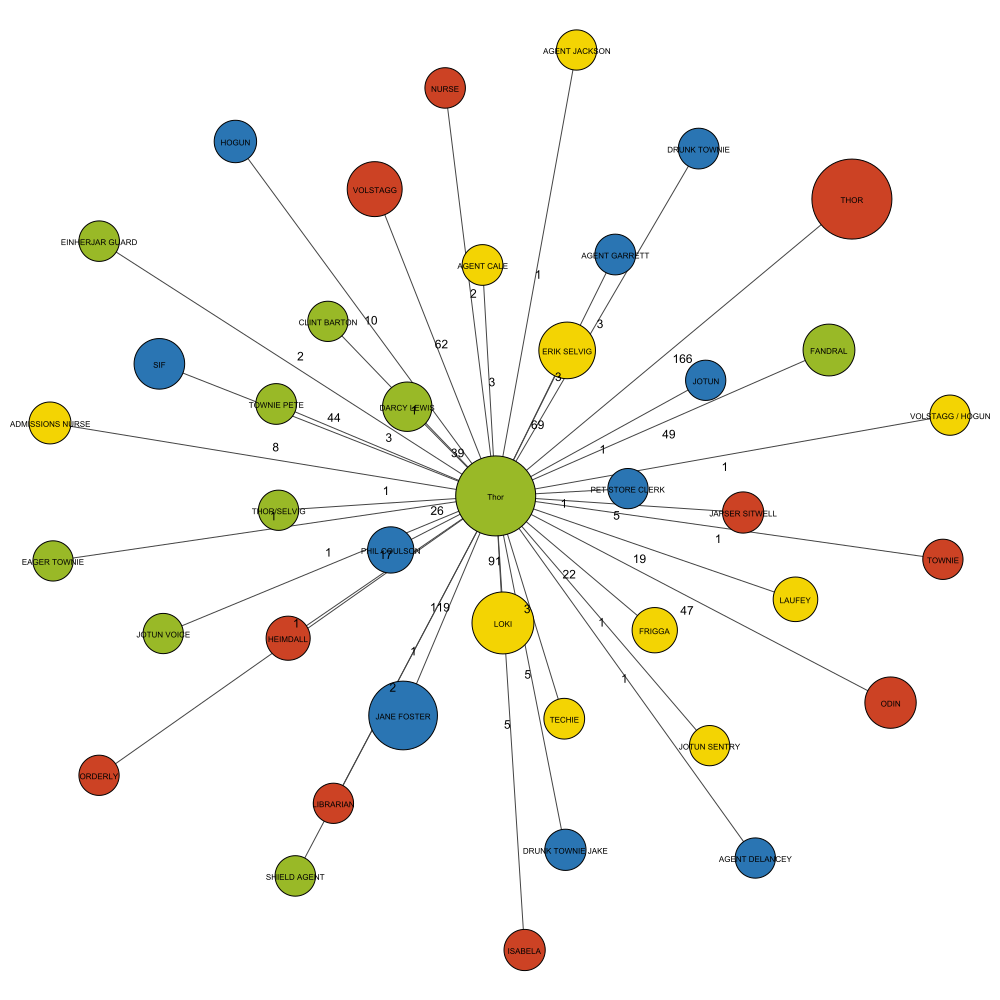

In [222]:
from igraph import *

g = Graph(directed=False)

g.add_vertices(numero_nos)

i = 0
for personagem in personagens:
    g.vs[i]["id"]= personagem
    g.vs[i]["label"]= personagem   
    i+=1

for filme in filmes:
    g.vs[i]["id"]= filme
    g.vs[i]["label"]= filme   
    i+=1

        
g.vs["id"]

edges = []
weights = []
index_personagem = 0
for (i, row) in df.iterrows():
    j = 0
    for column in filmes:
        if row[column] > 0:
            relation = (index_personagem, numero_personagens + j)
            edges.append(relation)
            weights.append(row[column])
        j += 1
    index_personagem+=1

edges
g.add_edges(edges)
g.es["weight"] = weights
g.es["label"] = weights


def tamanho_vertice(peso):
    return 40 * (1+(peso/max(weights)))

vertices = list(map(tamanho_vertice, weights))

vertices += [80] * numero_filmes 

visual_style = {}
out_name = "marvel.png"

visual_style["bbox"] = (1000, 1000)
visual_style["margin"] = 50
visual_style["vertex_color"]  = ["#CC4224", "#F3D403", "#2A75B3", "#99B927"]
visual_style["vertex_size"] = vertices
visual_style["vertex_label_size"] = 8
visual_style["edge_curved"] = False

my_layout = g.layout_lgl()
visual_style["layout"] = my_layout
plot(g, out_name, **visual_style)

In [231]:
df = pd.read_csv("characters.csv", header=0)
df = df.drop(columns=["total lines", "total words", "movie appearances", "avg words per line", "avg lines per movie"])
personagens_principais = ["TONY STARK", "STEVE ROGERS", "THOR", "PETER PARKER", "NATASHA ROMANOFF", "BRUCE BANNER", "NICK FURY"]

homem_de_ferro = ["Iron Man", "Iron Man 2", "Iron Man 3"]
vingadores = ["Avengers: Age of Ultron", "Avengers: Endgame", "Avengers: Infinity War"]

colunas = select_columns(df, homem_de_ferro) # Por filme
df = select_character(df, personagens_principais) #Por personagem

# df = df.filter(items=colunas)
df = df.loc[:, (df != 0).any(axis=0)]
filmes = homem_de_ferro 
df = df[(df[filmes] != 0).any(axis=1)]
personagens = df["character"].loc[~(df==0).all(axis=1)]
numero_personagens = personagens.count()
numero_filmes = len(filmes)
numero_nos = numero_personagens + numero_filmes


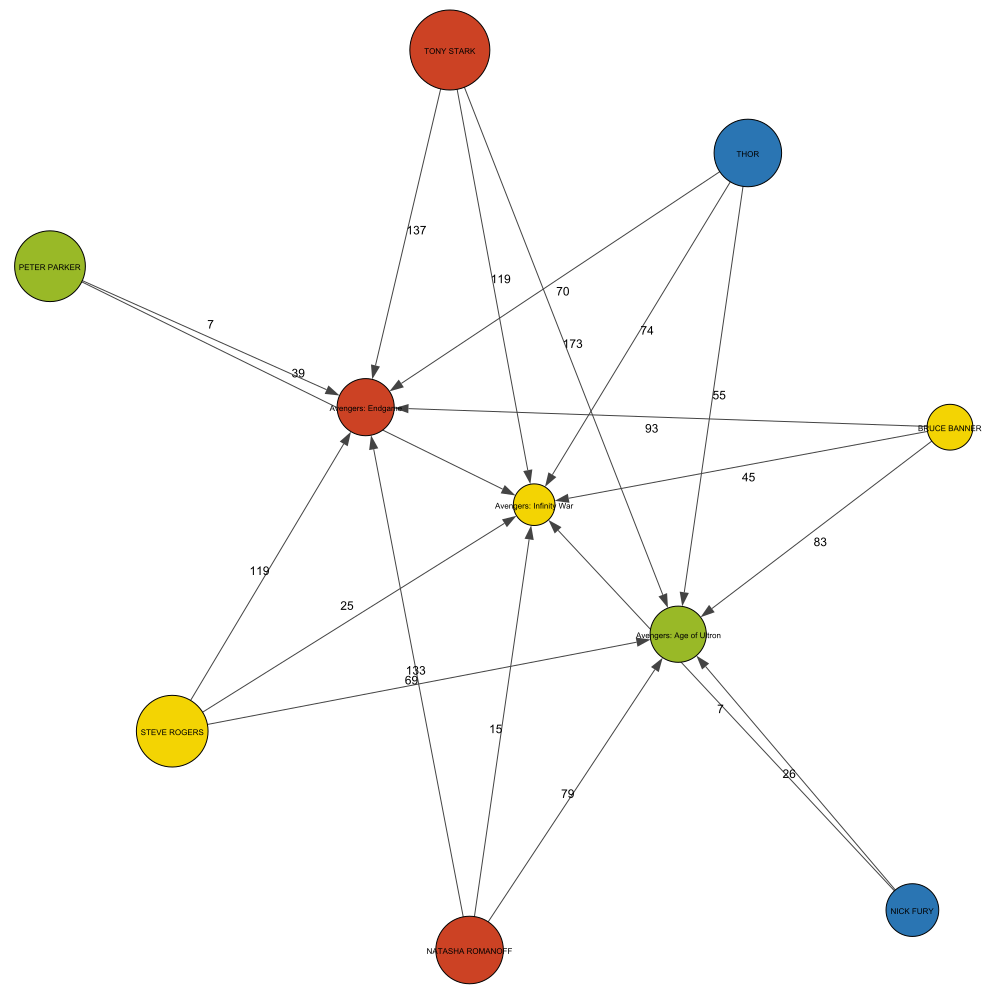

In [244]:
from igraph import *

g = Graph(directed=True)

g.add_vertices(numero_nos)

i = 0
for personagem in personagens:
    g.vs[i]["id"]= personagem
    g.vs[i]["label"]= personagem   
    i+=1

for filme in filmes:
    g.vs[i]["id"]= filme
    g.vs[i]["label"]= filme   
    i+=1

        
g.vs["id"]

edges = []
weights = []
index_personagem = 0
for (i, row) in df.iterrows():
    j = 0
    for column in filmes:
        if row[column] > 0:
            relation = (index_personagem, numero_personagens + j)
            edges.append(relation)
            weights.append(row[column])
        j += 1
    index_personagem+=1

edges
g.add_edges(edges)
g.es["weight"] = weights
g.es["label"] = weights


def tamanho_vertice(peso):
    return 40 * (1+(peso/max(weights)))

vertices = list(map(tamanho_vertice, weights))

vertices += [80] * numero_filmes 

visual_style = {}
out_name = "marvel.png"

visual_style["bbox"] = (1000, 1000)
visual_style["margin"] = 50
visual_style["vertex_color"]  = ["#CC4224", "#F3D403", "#2A75B3", "#99B927"]
visual_style["vertex_size"] = vertices
visual_style["vertex_label_size"] = 8
visual_style["edge_curved"] = False

my_layout = g.layout_lgl()
visual_style["layout"] = my_layout
plot(g, out_name, **visual_style)

In [240]:
df = pd.read_csv("characters.csv", header=0)
df = df.drop(columns=["total lines", "total words", "movie appearances", "avg words per line", "avg lines per movie"])
personagens_principais = ["TONY STARK", "STEVE ROGERS", "THOR", "PETER PARKER", "NATASHA ROMANOFF", "BRUCE BANNER", "NICK FURY"]

homem_de_ferro = ["Iron Man", "Iron Man 2", "Iron Man 3"]
vingadores = ["Avengers: Age of Ultron", "Avengers: Endgame", "Avengers: Infinity War"]

colunas = select_columns(df, vingadores) # Por filme
# colunas = select_columns(df, df.columns.to_list()) # Por filme
df = select_character(df, personagens_principais) #Por personagem

df = df.filter(items=colunas)
filmes = vingadores
df = df[(df[filmes] != 0).any(axis=1)]
personagens = df["character"].loc[~(df==0).all(axis=1)]
numero_personagens = personagens.count()
numero_filmes = len(filmes)
numero_nos = numero_personagens + numero_filmes

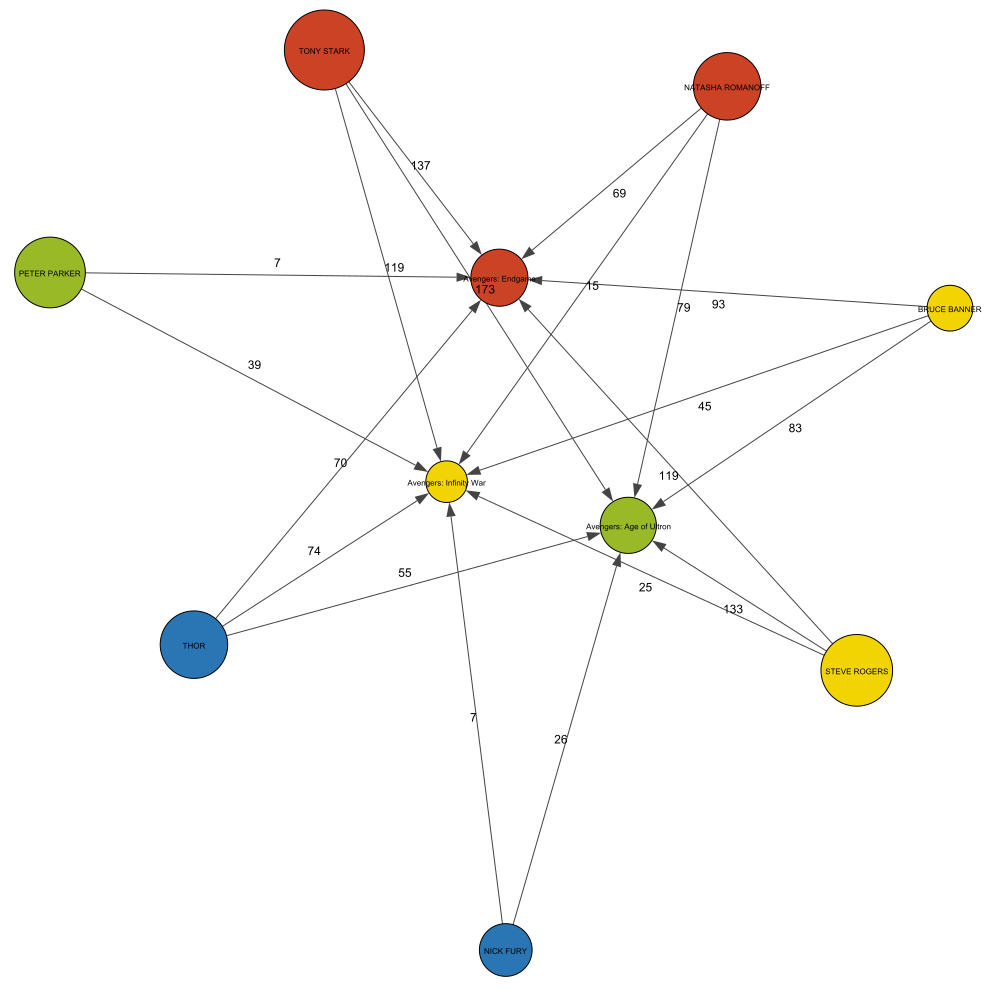

In [243]:
from igraph import *

g = Graph(directed=True)

g.add_vertices(numero_nos)

i = 0
for personagem in personagens:
    g.vs[i]["id"]= personagem
    g.vs[i]["label"]= personagem   
    i+=1

for filme in filmes:
    g.vs[i]["id"]= filme
    g.vs[i]["label"]= filme   
    i+=1

        
g.vs["id"]

edges = []
weights = []
index_personagem = 0
for (i, row) in df.iterrows():
    j = 0
    for column in filmes:
        if row[column] > 0:
            relation = (index_personagem, numero_personagens + j)
            edges.append(relation)
            weights.append(row[column])
        j += 1
    index_personagem+=1

edges
g.add_edges(edges)
g.es["weight"] = weights
g.es["label"] = weights


def tamanho_vertice(peso):
    return 40 * (1+(peso/max(weights)))

vertices = list(map(tamanho_vertice, weights))

vertices += [80] * numero_filmes 

visual_style = {}
out_name = "marvel.png"

visual_style["bbox"] = (1000, 1000)
visual_style["margin"] = 50
visual_style["vertex_color"]  = ["#CC4224", "#F3D403", "#2A75B3", "#99B927"]
visual_style["vertex_size"] = vertices
visual_style["vertex_label_size"] = 8
visual_style["edge_curved"] = False

my_layout = g.layout_lgl()
visual_style["layout"] = my_layout
plot(g, out_name, **visual_style)